RIO-125: Rank features of a smartphone - Build a python application to classify and rank dataset

### LIFE CYCLE OF A DATA SCIENCE PROJECT

#### 1 Data Gathering 

#### 2 Data Analysis

#### 3 Feature Engineering 

#### 4 Feature Selection

#### 5 Model Building 

#### 6 Hyper-Parametric Tuning 

### STEP -1 DATA GATHERING

IMPORTING SOME MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

CREATING DATA-FRAME 

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\PROJECT\train.csv')

### STEP - 2 Data Analysis

#### 1. Identify the missing values
#### 2. All the numerical values
#### 3. Distribution of the numerical values
#### 4. Categorical variables
#### 5. Cardinality of categorical variables
#### 6. Outliers 
#### 7. Relationship between independent and dependent variables

NO OF COLUMNS AND ROWS IN DATA FRAME

In [3]:
df.shape

(2000, 21)

NAME OF ALL COLUMNS 

In [4]:
df.columns 

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

DEPENDENT VARIABLE IS price_range AND REST ARE ALL INDEPENDENT VARIABLES

COMPUTING nan VALUES OF THE FEATURES

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
for column in df.columns:
    print(column , " has ",df[column].isnull().mean(),"% missing values")

battery_power  has  0.0 % missing values
blue  has  0.0 % missing values
clock_speed  has  0.0 % missing values
dual_sim  has  0.0 % missing values
fc  has  0.0 % missing values
four_g  has  0.0 % missing values
int_memory  has  0.0 % missing values
m_dep  has  0.0 % missing values
mobile_wt  has  0.0 % missing values
n_cores  has  0.0 % missing values
pc  has  0.0 % missing values
px_height  has  0.0 % missing values
px_width  has  0.0 % missing values
ram  has  0.0 % missing values
sc_h  has  0.0 % missing values
sc_w  has  0.0 % missing values
talk_time  has  0.0 % missing values
three_g  has  0.0 % missing values
touch_screen  has  0.0 % missing values
wifi  has  0.0 % missing values
price_range  has  0.0 % missing values


NO COLUMN HAS MISSING VALUES 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

FINDING THE NUMERICAL FEATURES IN THE DATA-FRAME

In [8]:
numerical_form = [column for column in df.columns if df[column].dtypes != 'O']

In [9]:
for column in numerical_form:
    print(column, " is in numerical form")

battery_power  is in numerical form
blue  is in numerical form
clock_speed  is in numerical form
dual_sim  is in numerical form
fc  is in numerical form
four_g  is in numerical form
int_memory  is in numerical form
m_dep  is in numerical form
mobile_wt  is in numerical form
n_cores  is in numerical form
pc  is in numerical form
px_height  is in numerical form
px_width  is in numerical form
ram  is in numerical form
sc_h  is in numerical form
sc_w  is in numerical form
talk_time  is in numerical form
three_g  is in numerical form
touch_screen  is in numerical form
wifi  is in numerical form
price_range  is in numerical form


TOTAL NUMERICAL FEATURES

In [10]:
len(numerical_form)

21

ALL COLUMNS ARE OF NUMERICAL TYPE

WANT TO KNOW THE DISTINCT VALUES THAT EACH FEATURE HAVE 

In [11]:
for column in numerical_form:
    print(column , " has ",len(df[column].unique())," unique values")

battery_power  has  1094  unique values
blue  has  2  unique values
clock_speed  has  26  unique values
dual_sim  has  2  unique values
fc  has  20  unique values
four_g  has  2  unique values
int_memory  has  63  unique values
m_dep  has  10  unique values
mobile_wt  has  121  unique values
n_cores  has  8  unique values
pc  has  21  unique values
px_height  has  1137  unique values
px_width  has  1109  unique values
ram  has  1562  unique values
sc_h  has  15  unique values
sc_w  has  19  unique values
talk_time  has  19  unique values
three_g  has  2  unique values
touch_screen  has  2  unique values
wifi  has  2  unique values
price_range  has  4  unique values


DISTRIBUTION OF ALL FEATURES

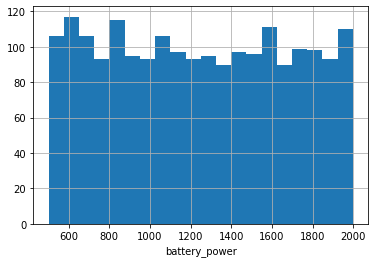

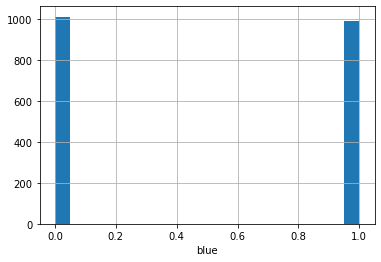

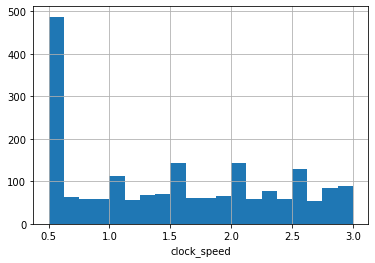

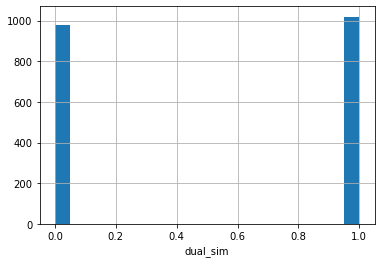

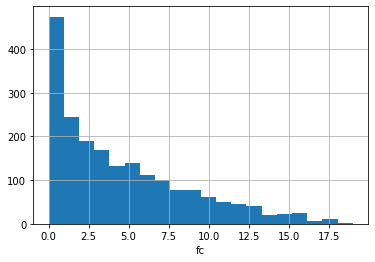

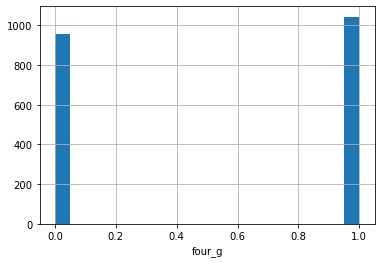

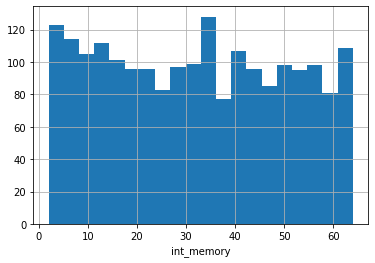

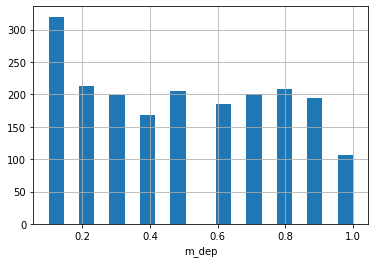

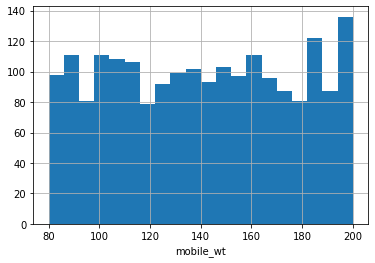

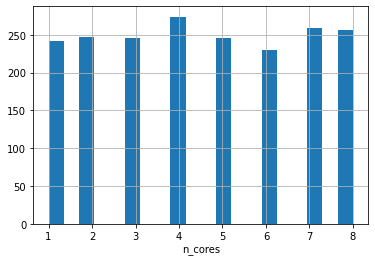

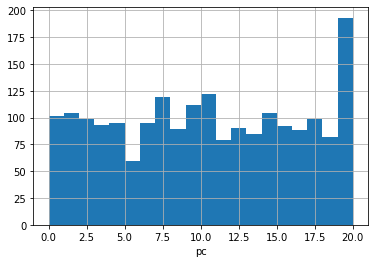

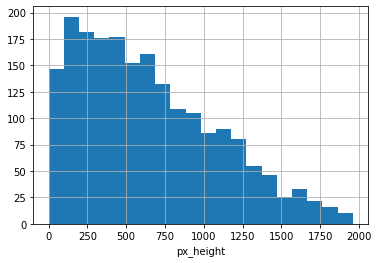

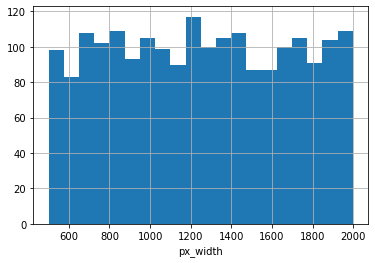

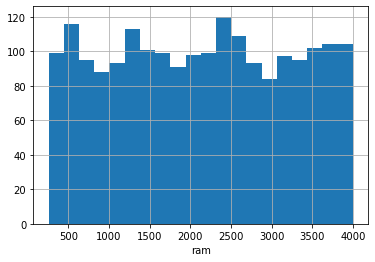

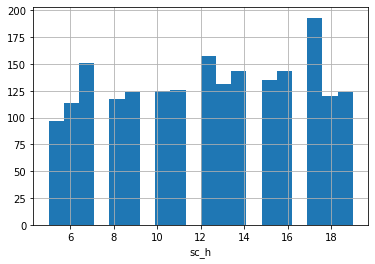

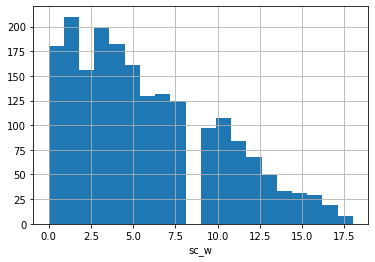

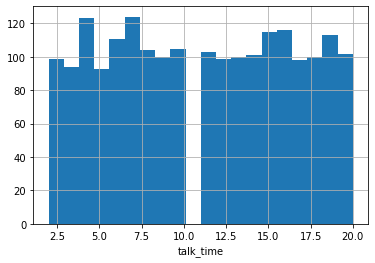

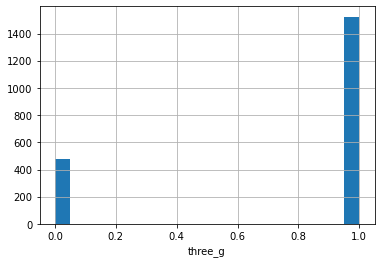

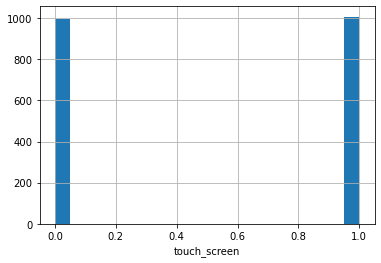

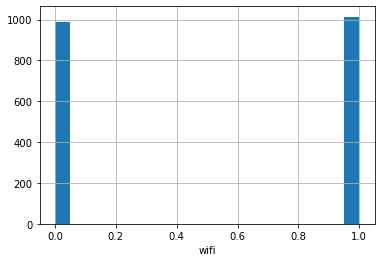

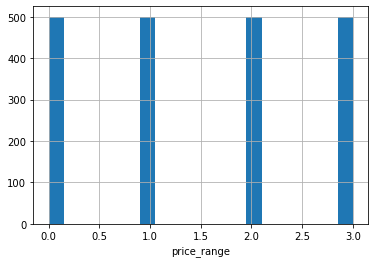

In [12]:
for column in numerical_form:
    df[column].hist(bins = 20)
    plt.xlabel(column)
    plt.show()

CATEGORIZING INTO CONTINUOUS AND CATEGORICAL VARIABLES

In [13]:
continuous_num_features = [column for column in df.columns if len(df[column].unique())>=15]
categorical_num_features = [column for column in df.columns if column not in continuous_num_features]

In [14]:
for column in continuous_num_features:
    print(column)

battery_power
clock_speed
fc
int_memory
mobile_wt
pc
px_height
px_width
ram
sc_h
sc_w
talk_time


In [15]:
for column in categorical_num_features:
    print(column)

blue
dual_sim
four_g
m_dep
n_cores
three_g
touch_screen
wifi
price_range


HERE , DEPENDENT VARIABLE price_range IS A CATEGORICAL FEATURE 

In [16]:
df[continuous_num_features].head(10)

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,141,14,1208,1212,1411,8,2,15
5,1859,0.5,3,22,164,7,1004,1654,1067,17,1,10
6,1821,1.7,4,10,139,10,381,1018,3220,13,8,18
7,1954,0.5,0,24,187,0,512,1149,700,16,3,5
8,1445,0.5,0,53,174,14,386,836,1099,17,1,20
9,509,0.6,2,9,93,15,1137,1224,513,19,10,12


DISTRIBUTION OF CONTINUOUS FEATURES

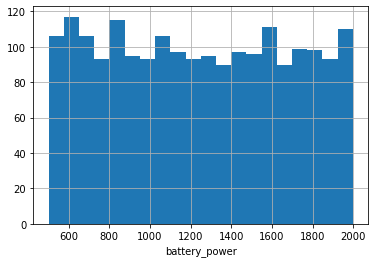

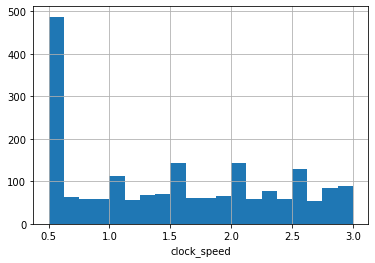

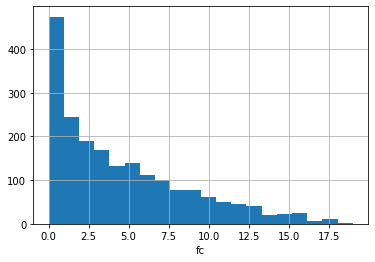

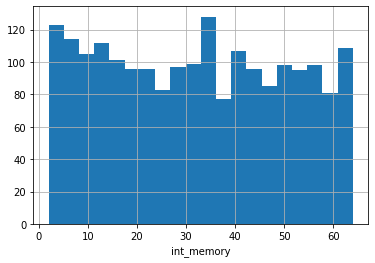

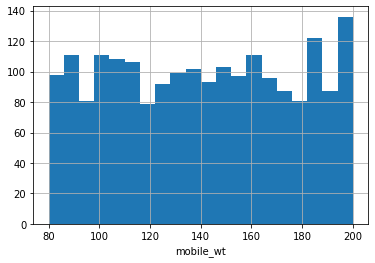

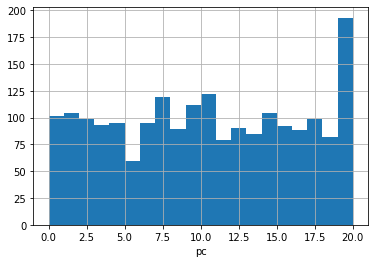

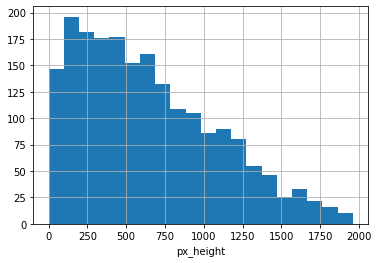

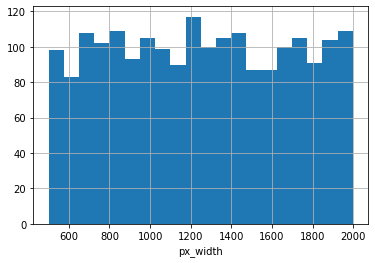

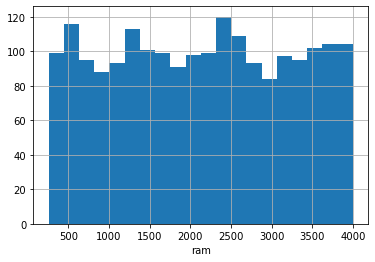

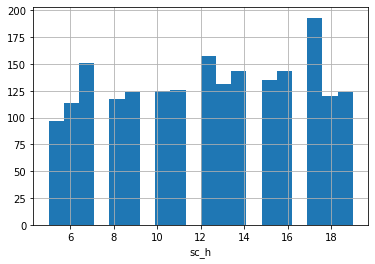

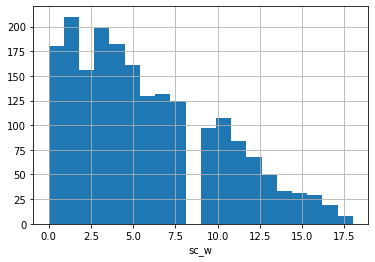

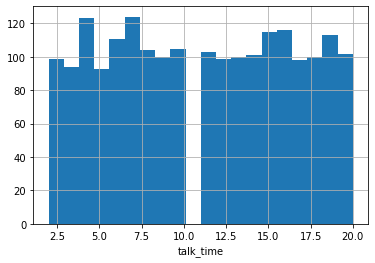

In [17]:
for column in continuous_num_features:
    df[column].hist(bins =20)
    plt.xlabel(column)
    plt.show()

In [18]:
df[categorical_num_features].head(10)

,blue,dual_sim,four_g,m_dep,n_cores,three_g,touch_screen,wifi,price_range
0,0,0,0,0.6,2,0,0,1,1
1,1,1,1,0.7,3,1,1,0,2
2,1,1,1,0.9,5,1,1,0,2
3,1,0,0,0.8,6,1,0,0,2
4,1,0,1,0.6,2,1,1,0,1
5,0,1,0,0.7,1,1,0,0,1
6,0,0,1,0.8,8,1,0,1,3
7,0,1,0,0.8,4,1,1,1,0
8,1,0,0,0.7,7,1,0,0,0
9,1,1,1,0.1,5,1,0,0,0


DISTRIBUTION OF CATEGORICAL FEATURES

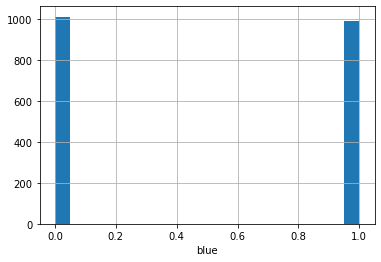

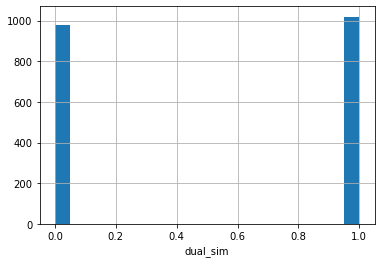

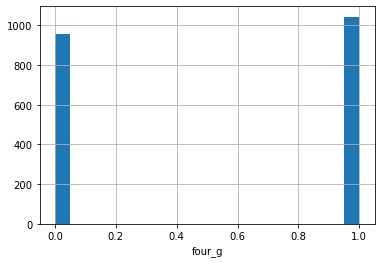

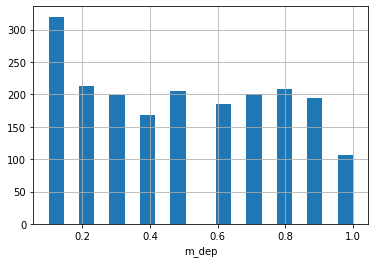

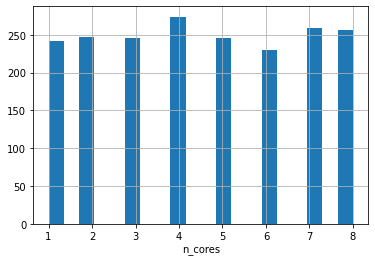

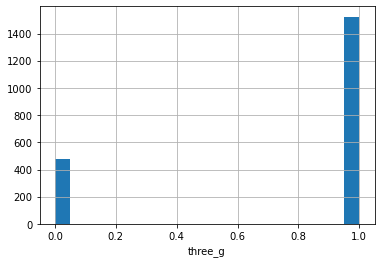

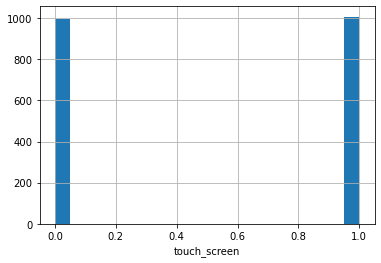

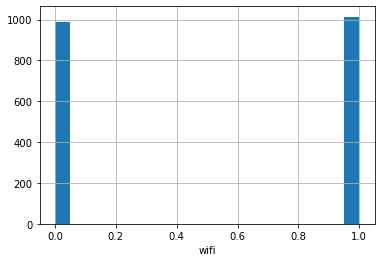

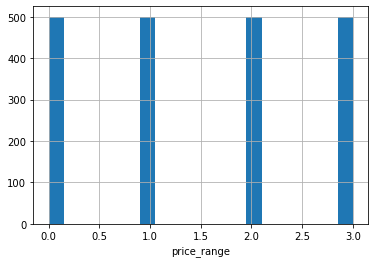

In [19]:
for column in categorical_num_features:
    df[column].hist(bins =20)
    plt.xlabel(column)
    plt.show()

CHECK FOR OUTLIERS 

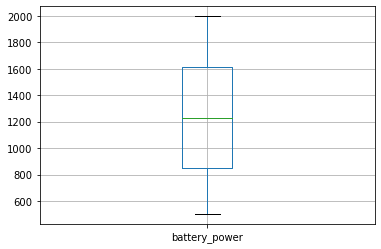

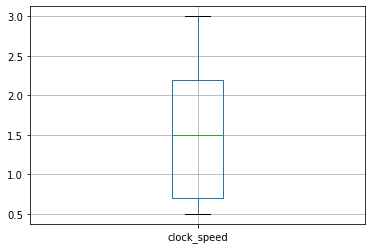

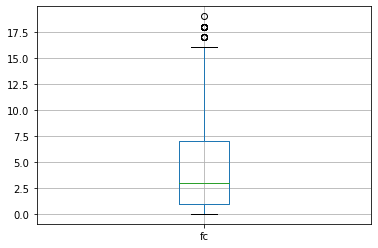

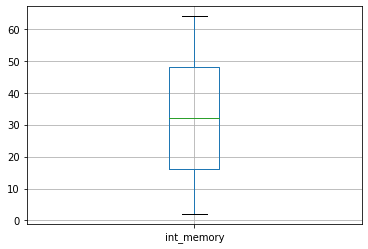

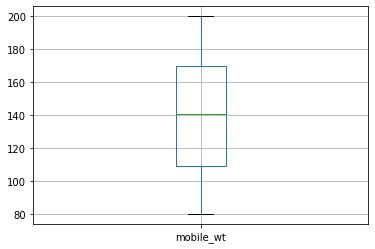

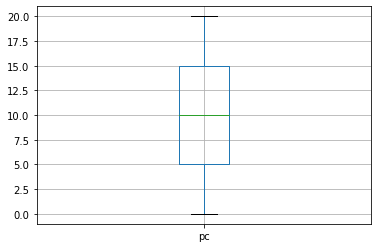

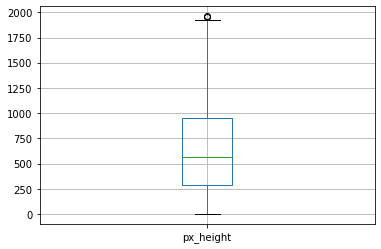

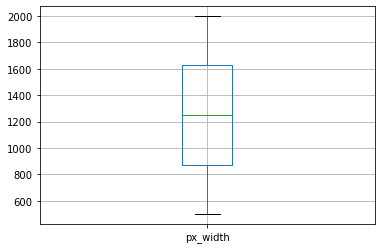

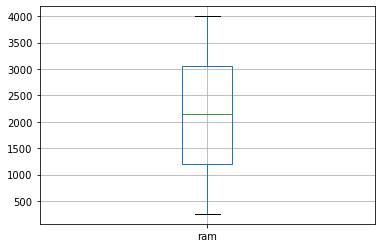

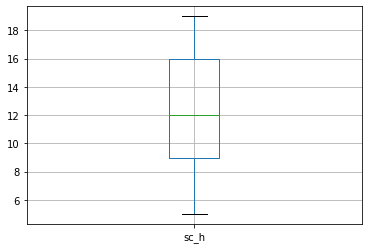

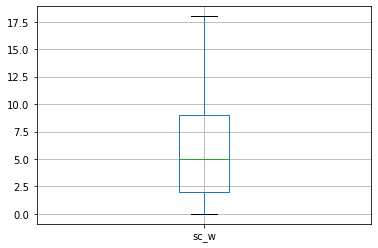

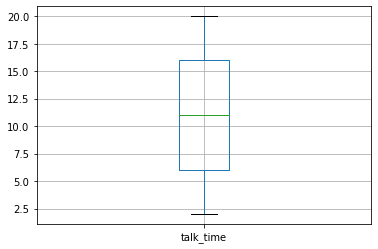

In [20]:
for column in  continuous_num_features:
    df.boxplot(column = column)
    plt.show()

THIS DATASET HAS VERY LESS OUTLIERS ONLY fc AND px_height HAS A FEW OUTLIERS

### Step -3 Feature Engineering


#### 1. Missing Values

#### 2. Temporal Variables

#### 3. Categorical Variables : remove rare labels

#### 4. Transform the values of the variables to same range

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_csv(r'C:\Users\hp\Desktop\PROJECT\train.csv')

AS DATA SET HAS NO MISSING VALUE SO NO FEATURE ENGG REQUIRED FOR  MISSING VALUES 

THE DATASET DOESN'T HAVE ANY TEMPORAL VARIABLES

In [23]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [24]:
continuous_num_features = [column for column in df.columns if len(df[column].unique())>=15]
categorical_num_features = [column for column in df.columns if column not in continuous_num_features]

In [25]:
for column in categorical_num_features:
    print(column , " has ", list(df[column].unique())," labels")

blue  has  [0, 1]  labels
dual_sim  has  [0, 1]  labels
four_g  has  [0, 1]  labels
m_dep  has  [0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, 0.2]  labels
n_cores  has  [2, 3, 5, 6, 1, 8, 4, 7]  labels
three_g  has  [0, 1]  labels
touch_screen  has  [0, 1]  labels
wifi  has  [1, 0]  labels
price_range  has  [1, 2, 3, 0]  labels


WE CAN SEE THAT FEATURE IS NOT HAVING LARGER NO OF LABELS . AT MAX IT HAS 10 LABELS

In [26]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

IT'S A BALANCED DATASET

COPYING THE DATASET

In [27]:
data1 = df.copy()

#### AS WE HAVE SEEN THAT IS DATASET DOESN'T MAKE BELL SHAPED DISTRIBUTION SO WE WILL APPLY NORMALIZATION ON THE DATASET

#### LET'S NORMALIZE THE FEATURES 

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaled_norm = MinMaxScaler()
scaled_norm = pd.DataFrame(scaled_norm.fit_transform(data1.drop('price_range',axis=1)),columns = data1.columns[:-1])
scaled_norm.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
5,0.907148,0.0,0.00,1.0,0.157895,0.0,0.322581,0.666667,0.700000,0.000000,0.35,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,0.50,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,0.00,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0
8,0.630595,1.0,0.00,0.0,0.000000,0.0,0.822581,0.666667,0.783333,0.857143,0.70,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0
9,0.005344,1.0,0.04,1.0,0.105263,1.0,0.112903,0.000000,0.108333,0.571429,0.75,0.580102,0.483311,0.068680,1.000000,0.555556,0.555556,1.0,0.0,0.0


In [29]:
scaled_norm['price_range'] = data1.price_range

In [30]:
scaled_norm.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
5,0.907148,0.0,0.00,1.0,0.157895,0.0,0.322581,0.666667,0.700000,0.000000,...,0.512245,0.770360,0.216729,0.857143,0.055556,0.444444,1.0,0.0,0.0,1
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,...,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0,3
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,...,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0,0
8,0.630595,1.0,0.00,0.0,0.000000,0.0,0.822581,0.666667,0.783333,0.857143,...,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0,0
9,0.005344,1.0,0.04,1.0,0.105263,1.0,0.112903,0.000000,0.108333,0.571429,...,0.580102,0.483311,0.068680,1.000000,0.555556,0.555556,1.0,0.0,0.0,0


SO I SCALED THE FEATURES 

In [31]:
x = scaled_norm.drop('price_range',axis =1)
y =scaled_norm.price_range

In [32]:
##splitting into 80:20

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [33]:
x_train.shape

(1600, 20)

In [34]:
x_test.shape

(400, 20)

### Step -4 Feature Selection

1-> REMOVE THE LOW VARIANCE FEATURES

2-> CHECK THE PEARSON RELATIONSHIP BETWEEN THE INDEPENDENT FEATURES

3-> TO SELECT ON BASIS OF MUTUAL GAIN HAVING CLASSIFIER O/P

4-> TO SELECT ON BASIS OF MUTUAL GAIN HAVING REGRESSOR O/P

5-> TO SELECT ON BASIS OF FIESCHER TEST

6-> FEATURE IMPORTANCE

#### WAY - 1 REMOVE LOW VARIANCE FEATURES

In [35]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold()
var_thresh.fit(x_train,y_train)
x_train.columns[var_thresh.get_support()]

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

THIS SHOWS NO ONE HAS LOW VARIANCE

#### WAY - 2 CHECK RELATION BETWEEN INDEPENDENT VARIABLES 

RELATIONSHIP BETWEEN INDEPENDENT FEATURES

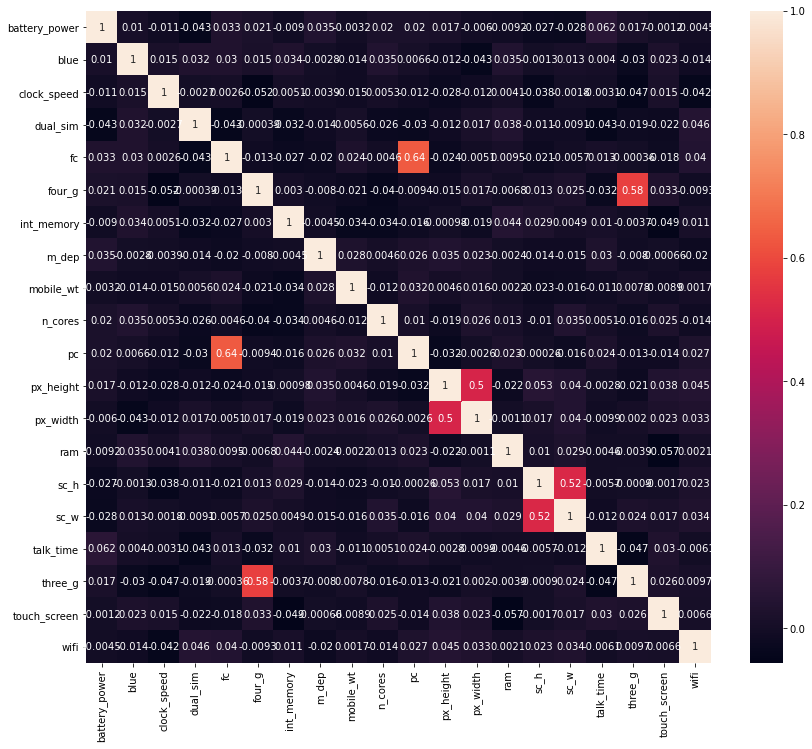

In [36]:
plt.figure(figsize = (14,12))
sns.heatmap(x_train.corr(),annot =True)
plt.show()

FROM PLOT WE CAN SEE THAT MAX TWO FEATURE ARE CORRELATED WITH FRACTION 0.64 WHICH PROVES THAT THEY ARE NOT MORE RELATED TO EACH OTHER 

LET'S GO FOR ANOTHER SELECTION WAY

#### WAY - 3 SELECTION ON BASIS OF MUTUAL GAIN

In [37]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train,y_train)
print(mutual_info)

[4.78733545e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.17125222e-02 8.58024414e-03 5.82733383e-03
 1.48034233e-04 1.00221174e-02 1.95070908e-02 3.66284779e-02
 2.40465209e-02 8.26711361e-01 6.57243935e-03 2.50419779e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [38]:
mutual_info = pd.Series(mutual_info , index = x_train.columns)
mutual_info.sort_values(ascending =False)

ram              0.826711
battery_power    0.047873
px_height        0.036628
sc_w             0.025042
px_width         0.024047
four_g           0.021713
pc               0.019507
n_cores          0.010022
int_memory       0.008580
sc_h             0.006572
m_dep            0.005827
mobile_wt        0.000148
talk_time        0.000000
touch_screen     0.000000
three_g          0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
wifi             0.000000
dtype: float64

THIS SHOWS THAT FEATURE WHICH IS HAVING 0 VALUE IMPLIES THAT THAT FEATURE IS OF 0 IMPOTANCE FOR THE O/P

THIS IS THE RANK OF THE FEATURE FROM HIGHER TO LOWER WICH ARE IMPORTANT WHILE PREDICTING THE OUTPUT

ram FEATURE IS VERY IMPORTANT WHILE PREDICTING THE O/P

<AxesSubplot:>

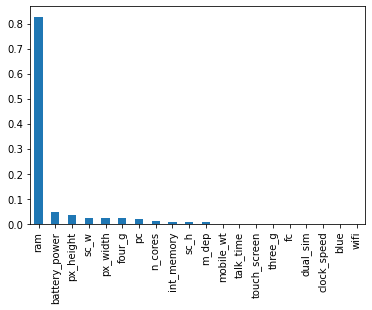

In [39]:
mutual_info.sort_values(ascending =False).plot.bar()

NOW AM GOING TO SELECT THE FEATURES WHO HAS MORE IMPORTANCE 

In [40]:
select = {column : round(mutual_info[column],5) for column in mutual_info.keys() if mutual_info[column]>0 }

In [41]:
select

{'battery_power': 0.04787,
 'four_g': 0.02171,
 'int_memory': 0.00858,
 'm_dep': 0.00583,
 'mobile_wt': 0.00015,
 'n_cores': 0.01002,
 'pc': 0.01951,
 'px_height': 0.03663,
 'px_width': 0.02405,
 'ram': 0.82671,
 'sc_h': 0.00657,
 'sc_w': 0.02504}

In [42]:
remove = [column for column in mutual_info.keys() if column not in select]

In [43]:
remove

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']


NOW REMOVING THE ELEMENTS NON IMPORTANT FROM THE SET

In [44]:
x_train = x_train.drop(remove , axis = 1)

In [45]:
x_train

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
582,0.488310,1.0,0.354839,0.222222,0.741667,0.571429,0.85,0.184184,0.206275,0.267504,0.785714,0.555556
159,0.894456,0.0,0.516129,0.666667,0.516667,0.000000,0.80,0.158673,0.697597,0.219669,0.214286,0.000000
1827,0.795591,1.0,0.000000,0.888889,0.216667,0.000000,0.85,0.968878,0.937250,0.941475,0.285714,0.166667
318,0.004676,1.0,0.645161,0.222222,0.116667,0.000000,0.40,0.019898,0.038051,0.108765,0.571429,0.666667
708,0.317969,0.0,0.532258,0.555556,0.708333,0.142857,0.75,0.766327,0.909212,0.924105,1.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.482966,0.0,0.500000,1.000000,0.641667,0.000000,0.90,0.266327,0.042056,0.946018,0.357143,0.277778
1216,0.438878,1.0,0.435484,0.666667,0.358333,0.142857,1.00,0.158673,0.865154,0.343666,0.857143,0.500000
1653,0.460254,0.0,0.612903,0.111111,0.108333,0.571429,0.05,0.713776,0.765020,0.896312,0.571429,0.388889
559,0.460922,0.0,0.177419,0.888889,0.741667,0.000000,0.35,0.091327,0.876502,0.206307,0.642857,0.333333


In [46]:
x_test = x_test.drop(remove , axis =1)

In [47]:
x_test

,battery_power,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
405,0.636607,0.0,0.516129,0.666667,0.025000,0.428571,0.15,0.127551,0.355808,0.845270,0.142857,0.277778
1190,0.394790,0.0,0.145161,0.444444,0.725000,0.285714,0.70,0.238776,0.047397,0.128541,0.642857,0.222222
1132,0.683367,0.0,0.129032,0.555556,0.783333,0.428571,0.05,0.078571,0.033378,0.647247,0.785714,0.277778
731,0.872411,0.0,0.758065,0.777778,0.375000,0.000000,0.50,0.171939,0.590120,0.440941,0.857143,0.722222
1754,0.390782,1.0,0.661290,0.111111,0.258333,0.714286,0.05,0.028571,0.433912,0.809460,0.428571,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.303273,0.0,0.661290,0.888889,0.525000,0.571429,0.40,0.636735,0.674900,0.314270,0.500000,0.500000
360,0.205745,0.0,0.306452,0.888889,0.091667,0.857143,0.95,0.741327,0.818425,0.272047,0.928571,0.388889
1810,0.062124,0.0,0.403226,0.000000,0.966667,0.571429,0.10,0.207653,0.018692,0.120791,0.857143,0.277778
1743,0.782899,0.0,0.645161,0.444444,0.850000,0.571429,0.30,0.109184,0.119493,0.758418,0.500000,0.222222


NOW WE HAVE IDENTIFIED THE FEATURES WHICH ARE IMPORTANT AND REMOVED IT TOO

WE CAN NOW BUILD MODEL

### Step - 5 Model Building 

#### LET'S APPLY LOGISTICS REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.935

VERY GOOD ACCURACY

#### LET'S APPLY SVM -

In [49]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.93

VERY - GOOD ACCURACY

#### LET'S APPLY KNN MODEL

In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6425

VERY - BAD ACCURACY

#### STEP - 6 HYPER TUNING THE FEW PARAMETERS 

In [51]:
from sklearn.model_selection import RandomizedSearchCV

random_size = {'n_neighbors':[5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              }

model_random = RandomizedSearchCV(estimator = model,param_distributions =random_size,n_iter =100,verbose =2,random_state=100
                                 ,n_jobs=-1)

In [52]:
model_random.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.5s finished


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [53]:
model_random.score(x_test,y_test)

0.665

NOT VERY GOOD AFTER HYPRTUNING TOO

#### WAY - 4 OF FEATURE SELECTION IE; MUTUAL_INFO IS FOR REGRESSION TYPE O/P- NO NEED TO APPLY HERE 

#### WAY - 5 OF FEATURE SELECTION FIESHER TEST. LET'S DO IT NOW

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [55]:
from sklearn.feature_selection import chi2

f_p_val = chi2(x_train,y_train)

In [56]:
f_p_val

(array([1.28216560e+01, 1.40127358e+00, 2.02153844e-01, 6.24301869e-01,
        4.65038748e-01, 1.24890071e+00, 1.28452957e+00, 4.31708942e-01,
        1.80101591e+00, 2.69945111e+00, 2.79315718e-01, 6.66283473e+00,
        7.92207674e+00, 2.24552217e+02, 7.01452074e-01, 8.27028597e-01,
        5.22862902e-01, 2.31936485e-02, 3.33175408e+00, 9.94585406e-02]),
 array([5.03859579e-03, 7.05236224e-01, 9.77240847e-01, 8.90847171e-01,
        9.26502303e-01, 7.41301351e-01, 7.32809921e-01, 9.33617017e-01,
        6.14713886e-01, 4.40320581e-01, 9.63870506e-01, 8.34572305e-02,
        4.76498970e-02, 2.08269442e-48, 8.72862353e-01, 8.42991822e-01,
        9.13840575e-01, 9.99067062e-01, 3.43247465e-01, 9.91902322e-01]))

HERE , f_p_val[0] IS GIVING F - SCORE
HERE ,f_p_val[1] IS GIVING P - VALUE

#### 1 THE MORE VALUE OF THE F-SCORE THE MORE IMPORTANT IS THE FEATURE 
#### 2 THE LESSER THE VALUE OF P THE MORE IMPORTANT IS THE FEATURE 

WE CAN GO WITH THE EITHER ONE 

In [57]:
f_score = pd.Series(f_p_val[0],index = x_train.columns)
print(f_score.sort_values(ascending =False))

ram              224.552217
battery_power     12.821656
px_width           7.922077
px_height          6.662835
touch_screen       3.331754
n_cores            2.699451
mobile_wt          1.801016
blue               1.401274
int_memory         1.284530
four_g             1.248901
sc_w               0.827029
sc_h               0.701452
dual_sim           0.624302
talk_time          0.522863
fc                 0.465039
m_dep              0.431709
pc                 0.279316
clock_speed        0.202154
wifi               0.099459
three_g            0.023194
dtype: float64


SO HERE ram IS THE MOST IMPORTANT FEATURE CONTRIBUTIN TO THE O/P AND three_g IS THE LEAST IMPORTANT FEATURE 

<AxesSubplot:>

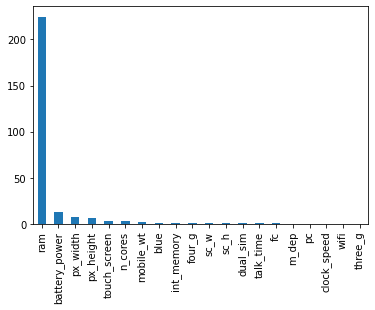

In [58]:
f_score.sort_values(ascending =False).plot.bar()

NOW AM GOING TO SELECT THE FEATURES WHO HAS MORE IMPORTANCE 

In [59]:
select = {column : round(f_score[column],5) for column in f_score.keys() if f_score[column]>1}

In [60]:
select

{'battery_power': 12.82166,
 'blue': 1.40127,
 'four_g': 1.2489,
 'int_memory': 1.28453,
 'mobile_wt': 1.80102,
 'n_cores': 2.69945,
 'px_height': 6.66283,
 'px_width': 7.92208,
 'ram': 224.55222,
 'touch_screen': 3.33175}

In [61]:
remove = [column for column in f_score.keys() if column not in select]

DROPPING FEATURES WHICH ARE NOT IMPORTANT 

In [62]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove , axis =1)

In [63]:
x_train

,battery_power,blue,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
582,0.488310,0.0,1.0,0.354839,0.741667,0.571429,0.184184,0.206275,0.267504,0.0
159,0.894456,0.0,0.0,0.516129,0.516667,0.000000,0.158673,0.697597,0.219669,0.0
1827,0.795591,0.0,1.0,0.000000,0.216667,0.000000,0.968878,0.937250,0.941475,1.0
318,0.004676,0.0,1.0,0.645161,0.116667,0.000000,0.019898,0.038051,0.108765,0.0
708,0.317969,1.0,0.0,0.532258,0.708333,0.142857,0.766327,0.909212,0.924105,1.0
...,...,...,...,...,...,...,...,...,...,...
835,0.482966,1.0,0.0,0.500000,0.641667,0.000000,0.266327,0.042056,0.946018,1.0
1216,0.438878,0.0,1.0,0.435484,0.358333,0.142857,0.158673,0.865154,0.343666,0.0
1653,0.460254,0.0,0.0,0.612903,0.108333,0.571429,0.713776,0.765020,0.896312,0.0
559,0.460922,0.0,0.0,0.177419,0.741667,0.000000,0.091327,0.876502,0.206307,1.0


In [64]:
x_test

,battery_power,blue,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,touch_screen
405,0.636607,1.0,0.0,0.516129,0.025000,0.428571,0.127551,0.355808,0.845270,1.0
1190,0.394790,1.0,0.0,0.145161,0.725000,0.285714,0.238776,0.047397,0.128541,1.0
1132,0.683367,1.0,0.0,0.129032,0.783333,0.428571,0.078571,0.033378,0.647247,0.0
731,0.872411,1.0,0.0,0.758065,0.375000,0.000000,0.171939,0.590120,0.440941,1.0
1754,0.390782,1.0,1.0,0.661290,0.258333,0.714286,0.028571,0.433912,0.809460,1.0
...,...,...,...,...,...,...,...,...,...,...
638,0.303273,0.0,0.0,0.661290,0.525000,0.571429,0.636735,0.674900,0.314270,1.0
360,0.205745,0.0,0.0,0.306452,0.091667,0.857143,0.741327,0.818425,0.272047,0.0
1810,0.062124,1.0,0.0,0.403226,0.966667,0.571429,0.207653,0.018692,0.120791,1.0
1743,0.782899,1.0,0.0,0.645161,0.850000,0.571429,0.109184,0.119493,0.758418,0.0


### Step - 4 Model Building

#### LET'S APPLY LOGISTIC REGRESSION

In [65]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9225

VERY GOOD ACCURACY

#### LET'S APPLY SVM MODEL

In [66]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9075

VERY GOOD ACCURACY 

#### LET'S APPLY KNN MODEL

In [67]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.605

VERY BAD ACCURACY

#### WAY - 6 FEATURE IMPORTANCE 

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [70]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [71]:
extratc=ExtraTreesClassifier()
extratc.fit(x,y)

ExtraTreesClassifier()

In [72]:
extratc.feature_importances_

array([0.06317381, 0.01928136, 0.03225949, 0.02001034, 0.03264088,
       0.01727038, 0.03487856, 0.03207776, 0.03570093, 0.03279667,
       0.03296089, 0.04653127, 0.04862584, 0.40032446, 0.03316318,
       0.03347652, 0.03378693, 0.01399005, 0.01795787, 0.01909281])

In [73]:
extra_f=pd.Series(extratc.feature_importances_,index=x.columns)

<AxesSubplot:>

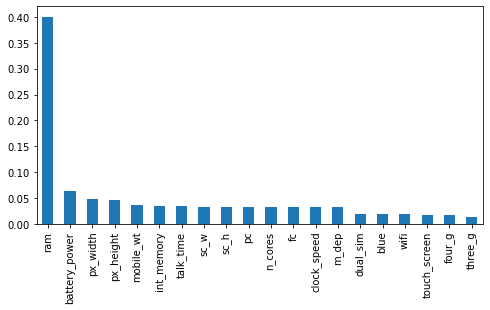

In [74]:
plt.figure(figsize=(8,4))
extra_f.sort_values(ascending=False).plot.bar()

LIST OF FEATURES TO BE REMOVED FROM THE DATA SET

In [75]:
remove=list(extra_f.sort_values(ascending=False).index[14:])
remove

['dual_sim', 'blue', 'wifi', 'touch_screen', 'four_g', 'three_g']

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

REMOVING FROM THE TRAIN AND TEST SET

In [77]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove , axis =1)

### STEP - 5 MODEL BUILDING

#### LET'S APPLY LOGISTIC REGRESSION

In [78]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.935

VERY GOOD ACCURACY

#### LET'S APPLY SVM 

In [79]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.91

GOOD ACCURACY

#### LET'S APPLY KNN 

In [80]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6025

VERY BAD ACCURACY

#### SO BASICALLY WHAT I HAVE DONE HERE I NORMALIZED MY DATA SET (FEATURE SCALING) AND THEN APPLIED THE FEATURE SELECTION WAYS AND THEN BUILD THE RESPECTIVE MODELS

I WANT TO TRANSFORM MY CONTINUOUS AND CATEGORICAL NUMERICAL FEATURE TO GIVE A NORMAL DISTRIBUTION AND THEN , I WILL PERFORM STANDARDIZATION/NORMALIZATION AND THEN FEATURE SELECTION AND MODEL BUILDING 

I AM USING SQRT TRANSFORMATION ON CONTINUOUS VARIABLES AND COUNT/FREQUENCY COUNT ON CATEGORICAL FEATURES 

#### SQRT TRANSFORMATION ON CONTINUOUS AND COUNT/FREQUENCY ON CATEGORICAL VARIABLES

In [81]:
data2 = df.copy()

In [82]:
## CONTINUOUS VAIRABLES

import pylab
import scipy.stats as stat

def plot_QQ(dataset,feature):
    plt.subplot(1,2,1)
    dataset[feature].hist(bins =20)
    plt.subplot(1,2,2)
    stat.probplot(dataset[feature],plot = pylab)
    plt.show()

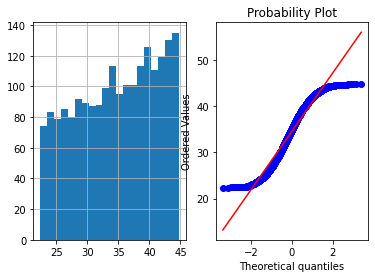

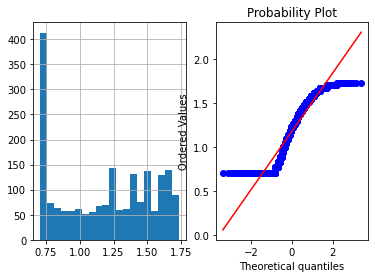

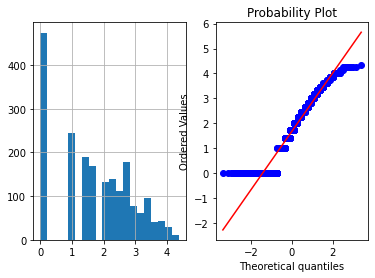

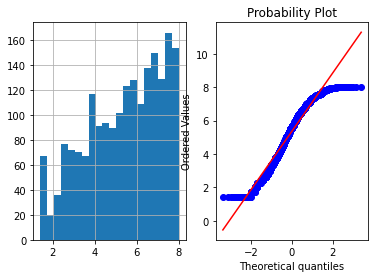

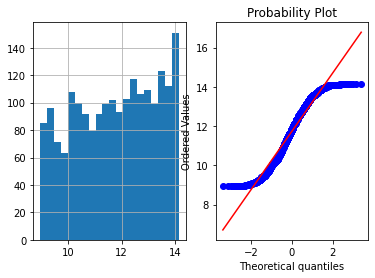

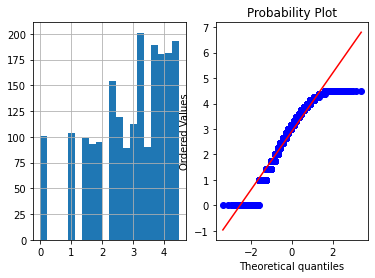

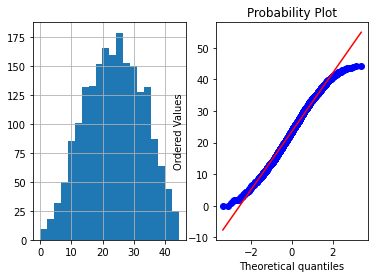

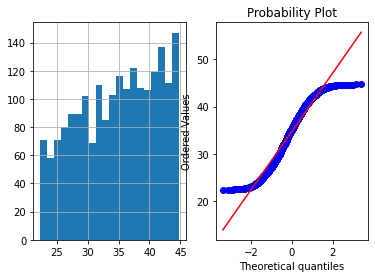

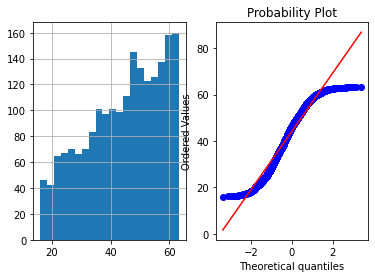

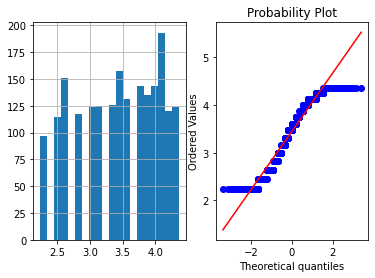

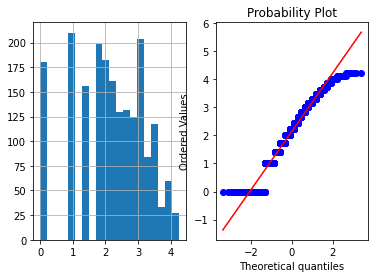

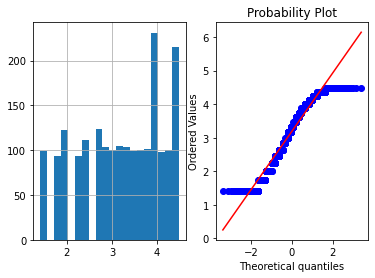

In [83]:

for feature in continuous_num_features:
    data2[feature] = np.sqrt(data2[feature])
    plot_QQ(data2,feature)

I CAN SEE FROM PLOTS THAT AS MOST POINTS FALL ON THE LINE THAT MEANS THESE FEATURE ARE MORELY DISTRIBUTED NORMALLY

In [84]:
## CATEGORICAL FEATURES

def freq_count(dataset,feature):
    if feature == 'price_range':
        pass
    else:
        count = dataset[feature].value_counts().to_dict()
        
        dataset[feature] = dataset[feature].map(count)

In [85]:
for feature in categorical_num_features:
    freq_count(data2,feature)

In [86]:
data2[categorical_num_features].head(10)

,blue,dual_sim,four_g,m_dep,n_cores,three_g,touch_screen,wifi,price_range
0,1010,981,957,186,247,477,994,1014,1
1,990,1019,1043,200,246,1523,1006,986,2
2,990,1019,1043,195,246,1523,1006,986,2
3,990,981,957,208,230,1523,994,986,2
4,990,981,1043,186,247,1523,1006,986,1
5,1010,1019,957,200,242,1523,994,986,1
6,1010,981,1043,208,256,1523,994,1014,3
7,1010,1019,957,208,274,1523,1006,1014,0
8,990,981,957,200,259,1523,994,986,0
9,990,1019,1043,320,246,1523,994,986,0


In [87]:
data2[continuous_num_features].head(10)

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,29.017236,1.483240,1.000000,2.645751,13.711309,1.414214,4.472136,27.495454,50.487622,3.000000,2.645751,4.358899
1,31.953091,0.707107,0.000000,7.280110,11.661904,2.449490,30.083218,44.586994,51.293274,4.123106,1.732051,2.645751
2,23.727621,0.707107,1.414214,6.403124,12.041595,2.449490,35.538711,41.424630,51.019604,3.316625,1.414214,3.000000
3,24.799194,1.581139,0.000000,3.162278,11.445523,3.000000,34.871192,42.261093,52.621288,4.000000,2.828427,3.316625
4,42.673177,1.095445,3.605551,6.633250,11.874342,3.741657,34.756294,34.813790,37.563280,2.828427,1.414214,3.872983
5,43.116122,0.707107,1.732051,4.690416,12.806248,2.645751,31.685959,40.669399,32.664966,4.123106,1.000000,3.162278
6,42.673177,1.303840,2.000000,3.162278,11.789826,3.162278,19.519221,31.906112,56.745044,3.605551,2.828427,4.242641
7,44.204072,0.707107,0.000000,4.898979,13.674794,0.000000,22.627417,33.896903,26.457513,4.000000,1.732051,2.236068
8,38.013156,0.707107,0.000000,7.280110,13.190906,3.741657,19.646883,28.913665,33.151169,4.123106,1.000000,4.472136
9,22.561028,0.774597,1.414214,3.000000,9.643651,3.872983,33.719431,34.985711,22.649503,4.358899,3.162278,3.464102


NOW I HAVE TRANSFORMED MY CATEGORICAL AND CONTINUOUS VARIABLES

#### NOW I WILL DO FEATURE SCALING BY STANDARDIZING THE FEATURES

In [88]:
from sklearn.preprocessing import StandardScaler

x = data2.drop('price_range',axis =1)
y = data2.price_range

scaled_std = StandardScaler()
scaled_std = pd.DataFrame(scaled_std.fit_transform(data2.drop('price_range',axis=1)),columns = data2.columns[:-1])
scaled_std['price_range'] = data2.price_range
scaled_std.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.866293,0.990050,0.862730,-1.019184,-0.568805,-1.043966,-1.526585,-0.502556,1.294734,-0.291494,...,-2.074697,-1.159450,0.484335,-0.720551,0.463034,1.303752,-1.786861,-1.006018,0.986097,1
1,-0.410561,-1.010051,-1.375336,0.981177,-1.396008,0.957886,1.068544,-0.235746,-0.054635,-0.372487,...,0.695085,1.549870,0.546973,1.071352,-0.401295,-0.617220,0.559641,0.994018,-1.014099,2
2,-1.687398,-1.010051,-1.375336,0.981177,-0.226166,0.957886,0.577453,-0.331035,0.195361,-0.372487,...,1.285084,1.048578,0.525696,-0.215379,-0.701958,-0.219997,0.559641,0.994018,-1.014099,2
3,-1.521058,-1.010051,1.145033,-1.019184,-1.396008,-1.043966,-1.237342,-0.083283,-0.197105,-1.668374,...,1.212894,1.181172,0.650225,0.874938,0.635838,0.135038,0.559641,-1.006018,-1.014099,2
4,1.253514,-1.010051,-0.255519,-1.019184,1.586514,0.957886,0.706318,-0.502556,0.085238,-0.291494,...,1.200468,0.000639,-0.520520,-0.994294,-0.701958,0.758889,0.559641,0.994018,-1.014099,1
5,1.322273,0.990050,-1.375336,0.981177,0.036749,-1.043966,-0.381622,-0.235746,0.698824,-0.696459,...,0.868418,0.928860,-0.901359,1.071352,-1.093789,-0.038033,0.559641,-1.006018,-1.014099,1
6,1.253514,0.990050,0.345412,-1.019184,0.258398,0.957886,-1.237342,-0.083283,0.029591,0.437443,...,-0.447388,-0.460281,0.970843,0.245600,0.635838,1.173390,0.559641,-1.006018,0.986097,3
7,1.491155,0.990050,-1.375336,0.981177,-1.396008,-1.043966,-0.264831,-0.083283,1.270692,1.895317,...,-0.111243,-0.144704,-1.383983,0.874938,-0.401295,-1.076603,0.559641,0.994018,0.986097,0
8,0.530141,-1.010051,-1.375336,-1.019184,-1.396008,-1.043966,1.068544,-0.235746,0.952090,0.680422,...,-0.433582,-0.934638,-0.863557,1.071352,-1.093789,1.430726,0.559641,-1.006018,-1.014099,0
9,-1.868488,-1.010051,-1.180721,0.981177,-0.226166,0.957886,-1.328214,2.051197,-1.383494,-0.372487,...,1.088333,0.027892,-1.680052,1.447558,0.951649,0.300405,0.559641,-1.006018,-1.014099,0


In [89]:
x = scaled_std.drop('price_range',axis =1)
y = scaled_std['price_range']

In [90]:
## splitting the dataset into 80:20

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =0)

#### STEP - 4 FEATURE SELECTION

#### APPLYING WAY - 3 OF FEATURE SELECTION ... MUTUAL GAIN

In [91]:
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.04889161, 0.00350668, 0.00222863, 0.00511657, 0.04776303,
       0.        , 0.        , 0.02286619, 0.        , 0.00594558,
       0.        , 0.03769844, 0.01843858, 0.82758682, 0.01287222,
       0.0274502 , 0.        , 0.00799728, 0.02172271, 0.00364176])

In [92]:
mutual_info = pd.Series(mutual_info,index =x_train.columns)
mutual_info.sort_values(ascending =False)

ram              0.827587
battery_power    0.048892
fc               0.047763
px_height        0.037698
sc_w             0.027450
m_dep            0.022866
touch_screen     0.021723
px_width         0.018439
sc_h             0.012872
three_g          0.007997
n_cores          0.005946
dual_sim         0.005117
wifi             0.003642
blue             0.003507
clock_speed      0.002229
mobile_wt        0.000000
pc               0.000000
int_memory       0.000000
four_g           0.000000
talk_time        0.000000
dtype: float64

THIS IS THE RANK OF THE FEATURES HIGHER TO LOWER ON BASIS OF MUTUAL GAIN

ram IS THE MOST IMPORTANT WHILE talk_time IS OF LESS IMPORTANCE

<AxesSubplot:>

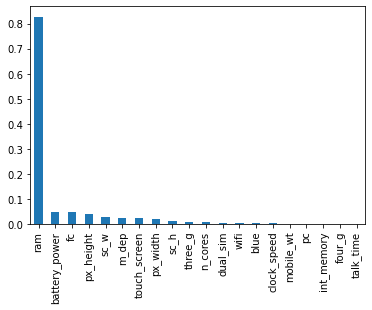

In [93]:
mutual_info.sort_values(ascending=False).plot.bar()

LIST OF NON IMPORTANT FEATURES

In [94]:
remove = [column for column in mutual_info.keys() if mutual_info[column]==0]

In [95]:
remove

['four_g', 'int_memory', 'mobile_wt', 'pc', 'talk_time']

REMOVING THE LESSER IMPORTANT FEAURES

In [96]:
x_train = x_train.drop(remove,axis =1)
x_test = x_test.drop(remove,axis =1)

#### STEP - 5 MODEL BUILDING 

APPLYING THE ALGORITHMS

#### APPLY LOGISTICS REGRESSION

In [97]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.95

WONDERFUL RESULT

#### APPLY SVM MODEL

In [98]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.895

GOOD ACCURACY

#### APPLY KNN MODEL

In [99]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.505

#### I AM HYPER- PARAMETRIC TUNING FEW FEATURES

In [100]:
random_size = {'n_neighbors':[5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              }

In [101]:
random_model = RandomizedSearchCV(param_distributions = random_size,verbose=2,n_jobs=-1,
                                  cv = 3,estimator = model,n_iter=100,random_state=100)

In [102]:
random_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.2s finished


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [103]:
random_model.score(x_test,y_test)

0.5425

#### LET'S APPLY NAIVE BAYES

In [104]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.805

NOT THAT GOOD ACCURACY

### STEP -6 HYPERPARAMETRIC TUNING 

I AM HHYPER PARA-METRIC TUNING THE FEW FEATURES

In [105]:
random_size={'priors':[0.2,0.1,0.4,0.5,0.6,None]}

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model_random = RandomizedSearchCV(param_distributions=random_size,estimator=model,verbose=2,
                                  cv =10 , n_iter=100,n_jobs=-1,random_state=100)

In [107]:
model_random.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'priors': [0.2, 0.1, 0.4, 0.5, 0.6,
                                                   None]},
                   random_state=100, verbose=2)

In [108]:
model_random.score(x_test,y_test)

0.805

NO IMPACT OF HYPERTUNING   

#### WAY- 5 OF FEATURE SEELCTION - FIESCHER TEST



#### WE CAN'T APPLY THIS METHOD AS STANDARDIZATION GIVES NEGATIVE VALUES TOO

#### WAY - 6 FEATURE IMPORTANCE

In [109]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.866293,0.990050,0.862730,-1.019184,-0.568805,-1.043966,-1.526585,-0.502556,1.294734,-0.291494,-1.269426,-2.074697,-1.159450,0.484335,-0.720551,0.463034,1.303752,-1.786861,-1.006018,0.986097
1,-0.410561,-1.010051,-1.375336,0.981177,-1.396008,0.957886,1.068544,-0.235746,-0.054635,-0.372487,-0.395378,0.695085,1.549870,0.546973,1.071352,-0.401295,-0.617220,0.559641,0.994018,-1.014099
2,-1.687398,-1.010051,-1.375336,0.981177,-0.226166,0.957886,0.577453,-0.331035,0.195361,-0.372487,-0.395378,1.285084,1.048578,0.525696,-0.215379,-0.701958,-0.219997,0.559641,0.994018,-1.014099
3,-1.521058,-1.010051,1.145033,-1.019184,-1.396008,-1.043966,-1.237342,-0.083283,-0.197105,-1.668374,0.069399,1.212894,1.181172,0.650225,0.874938,0.635838,0.135038,0.559641,-1.006018,-1.014099
4,1.253514,-1.010051,-0.255519,-1.019184,1.586514,0.957886,0.706318,-0.502556,0.085238,-0.291494,0.695555,1.200468,0.000639,-0.520520,-0.994294,-0.701958,0.758889,0.559641,0.994018,-1.014099


In [110]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [111]:
extratc=ExtraTreesClassifier()
extratc.fit(x,y)

ExtraTreesClassifier()

In [112]:
extratc.feature_importances_

array([0.06079172, 0.02031199, 0.03451137, 0.02053386, 0.03211709,
       0.01630982, 0.03587546, 0.03276624, 0.03704725, 0.03308113,
       0.03471778, 0.0471369 , 0.05042012, 0.39016985, 0.03382611,
       0.03350074, 0.03510688, 0.01390289, 0.0184672 , 0.0194056 ])

In [113]:
extra_f=pd.Series(extratc.feature_importances_,index=x.columns)

<AxesSubplot:>

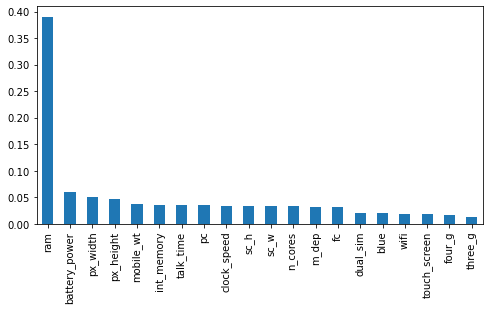

In [114]:
plt.figure(figsize=(8,4))
extra_f.sort_values(ascending=False).plot.bar()

In [115]:
remove=list(extra_f.sort_values(ascending=False).index[14:])
remove

['dual_sim', 'blue', 'wifi', 'touch_screen', 'four_g', 'three_g']

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### STEP -5 MODEL BUILDING

#### LET'S APPLY LOGISTIC REGRESSION

In [117]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.95

VERY GOOD ACCURACY

#### APPLY SVM MODEL

In [118]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9075

GOOD ACCURACY

#### APPLY KNN MODEL

In [119]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.485

VERY BAD ACCURACY

In [120]:
random_size = {'n_neighbors':[5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              }

In [121]:
random_model = RandomizedSearchCV(param_distributions = random_size,verbose=2,n_jobs=-1,
                                  cv = 3,estimator = model,n_iter=100,random_state=100)

In [122]:
random_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.3s finished


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [123]:
random_model.score(x_test,y_test)

0.5725

STILL VERY BAD ACCURACY

#### NOW TO BUILD DECISION TREE AND RANDOM FOREST MODELS WE DON'T NEED ANY FEATURE SCALING WE JUST DO THE FEATURE SEELCTION AND THEN MODEL BUILDING AND HYPER PARAMETRIC TUNING IF SO REQUIRED 

In [124]:
data3 = df.copy()

In [125]:
x = data3.drop('price_range',axis=1)
y = data3.price_range
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

### STEP - 4 FEATURE SELECTION

#### APPLYING WAY - 3

In [126]:
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.04874607, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02017855, 0.        , 0.00959442, 0.0087916 ,
       0.00450481, 0.04290191, 0.02618993, 0.82838997, 0.01166664,
       0.01655214, 0.        , 0.        , 0.        , 0.        ])

In [127]:
mutual_info = pd.Series(mutual_info , index = x_train.columns)
mutual_info.sort_values(ascending=False)

ram              0.828390
battery_power    0.048746
px_height        0.042902
px_width         0.026190
int_memory       0.020179
sc_w             0.016552
sc_h             0.011667
mobile_wt        0.009594
n_cores          0.008792
pc               0.004505
touch_screen     0.000000
talk_time        0.000000
m_dep            0.000000
three_g          0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
wifi             0.000000
dtype: float64

SELECTING IMPORTANT FEATURES

In [128]:
select = {column : mutual_info[column] for column in mutual_info.keys() if mutual_info[column]>0}

In [129]:
remove = [column for column in mutual_info.keys() if column not in select]

In [130]:
remove

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

REMOVING UN IMPORTANT FEATURES

In [131]:
x_train = x_train.drop(remove,axis=1)
x_test = x_test.drop(remove,axis =1)

### STEP -5 MODEL BUILDING 

#### DECISION TREE 

In [132]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.84

#### I AM TRYING HYPERPARAMETRIDC TUNINIG 

In [133]:
param = {"criterion": ['gini','entropy'],
         'splitter' : ["best", "random"],
         'min_samples_split' : [i for i in range(1,51)],
         'min_samples_leaf':[i for i in range(1,51)],
        "max_depth":[i for i in range(1,11)]}

In [134]:
from sklearn.model_selection import RandomizedSearchCV

model_random = RandomizedSearchCV(estimator=model,param_distributions = param,verbose=2,n_jobs=-1,random_state=100)

In [135]:
model_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,


In [136]:
model.score(x_test,y_test)

0.84

NO CHANGE - NO NEED OF HYPER TUNING 

#### RANDOM FOREST MODEL

In [137]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8925

GOOD ACCURACY

In [139]:
param = {'n_estimators' : [100,200,300,400,500],
         'criterion' : ["gini", "entropy"],
        'max_features' : ["auto", "sqrt", "log2"],
        "max_depth" : [None, 10],
        'min_samples_leaf': [1,3,5,4,6],
        'max_leaf_nodes': [2,4,1,5,6,None]}

In [140]:
model_random = RandomizedSearchCV(estimator=model,param_distributions = param,verbose=2,n_jobs=-1,random_state=100)

In [143]:
model_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.7s finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 4, 1, 5, 6, None],
                                        'min_samples_leaf': [1, 3, 5, 4, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100, verbose=2)

In [144]:
model_random.score(x_test,y_test)

0.815

AFTER TUNING ACCURACY DECREASES

### THE BEST RESULT I GOT IS 95% ACCURACY BY LOGISTIC REGRESSION
### SO LOGISTIC REGRESSION IS THE MOST SUITED MODEL FOR THIS DATASET
### I GOT THIS ACCURACY WHEN I APPLIED SQRT TRANSFORMATION  ON CONTINUOUS AND COUNT/FREQUENCY COUNT ON CATEGORICAL FEATURES 
### FEATURE SELECTION WAY 3 AND WAY 6 

####                                                   COMPLETE